1. os.listdir로 파일 가져오기

In [21]:
import os

In [22]:
img_dir = './사과/'

In [23]:
file_list = os.listdir(img_dir)
print(file_list)

['사과_1.jpg', '사과_10.jpg', '사과_11.jpg', '사과_12.jpg', '사과_13.jpg', '사과_14.jpg', '사과_15.jpg', '사과_16.jpg', '사과_17.jpg', '사과_18.jpg', '사과_19.jpg', '사과_2.jpg', '사과_20.jpg', '사과_3.jpg', '사과_4.jpg', '사과_5.jpg', '사과_6.jpg', '사과_7.jpg', '사과_8.jpg', '사과_9.jpg']


In [24]:
file_list = sorted(os.listdir(img_dir))  # 정렬
print(file_list)

['사과_1.jpg', '사과_10.jpg', '사과_11.jpg', '사과_12.jpg', '사과_13.jpg', '사과_14.jpg', '사과_15.jpg', '사과_16.jpg', '사과_17.jpg', '사과_18.jpg', '사과_19.jpg', '사과_2.jpg', '사과_20.jpg', '사과_3.jpg', '사과_4.jpg', '사과_5.jpg', '사과_6.jpg', '사과_7.jpg', '사과_8.jpg', '사과_9.jpg']


2. glob.glob으로 파일 가져오기

In [25]:
import glob
import os

from natsort import natsort  # 정렬에 필요한 라이브러리

In [26]:
file_list = glob.glob(os.path.join("./사과/", "*.jpg"))
print(file_list)

['./사과\\사과_1.jpg', './사과\\사과_10.jpg', './사과\\사과_11.jpg', './사과\\사과_12.jpg', './사과\\사과_13.jpg', './사과\\사과_14.jpg', './사과\\사과_15.jpg', './사과\\사과_16.jpg', './사과\\사과_17.jpg', './사과\\사과_18.jpg', './사과\\사과_19.jpg', './사과\\사과_2.jpg', './사과\\사과_20.jpg', './사과\\사과_3.jpg', './사과\\사과_4.jpg', './사과\\사과_5.jpg', './사과\\사과_6.jpg', './사과\\사과_7.jpg', './사과\\사과_8.jpg', './사과\\사과_9.jpg']


In [27]:
# pip install natsort

In [28]:
file_list_sort = natsort.natsorted(glob.glob(os.path.join("./사과/", "*.jpg")))
print(file_list_sort)

['./사과\\사과_1.jpg', './사과\\사과_2.jpg', './사과\\사과_3.jpg', './사과\\사과_4.jpg', './사과\\사과_5.jpg', './사과\\사과_6.jpg', './사과\\사과_7.jpg', './사과\\사과_8.jpg', './사과\\사과_9.jpg', './사과\\사과_10.jpg', './사과\\사과_11.jpg', './사과\\사과_12.jpg', './사과\\사과_13.jpg', './사과\\사과_14.jpg', './사과\\사과_15.jpg', './사과\\사과_16.jpg', './사과\\사과_17.jpg', './사과\\사과_18.jpg', './사과\\사과_19.jpg', './사과\\사과_20.jpg']


3. os.walk로 파일 가져오기

In [29]:
def get_img_paths(root_path):
    file_paths = []
    for (path, dir, files) in os.walk(root_path):
        for file in files:
            ext = os.path.splitext(file)[-1].lower()
            formats = ['.bmp', '.jpg', '.jpeg', '.png', '.tif', '.tiff', '.dng']
            if ext in formats:
                file_path = os.path.join(path, file)
                file_paths.append(file_path)
    return file_paths

file_paths = get_img_paths("./사과/")
print(file_paths)

['./사과/사과_1.jpg', './사과/사과_10.jpg', './사과/사과_11.jpg', './사과/사과_12.jpg', './사과/사과_13.jpg', './사과/사과_14.jpg', './사과/사과_15.jpg', './사과/사과_16.jpg', './사과/사과_17.jpg', './사과/사과_18.jpg', './사과/사과_19.jpg', './사과/사과_2.jpg', './사과/사과_20.jpg', './사과/사과_3.jpg', './사과/사과_4.jpg', './사과/사과_5.jpg', './사과/사과_6.jpg', './사과/사과_7.jpg', './사과/사과_8.jpg', './사과/사과_9.jpg']


4. 정사각형 데이터 만들기

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def expend2square(pil_img, background_color):
    width, height = pil_img.size
    
    if width ==height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, (0, (height - width) // 2, 0))
        return result

In [32]:
def resize_with_padding(pil_img, new_size, background_color):
    img = expend2square(pil_img, background_color)
    img = img.resize((new_size[0], new_size[1]), Image.ANTIALIAS)
    return img

C:\Users\bomi\AppData\Local\Temp\ipykernel_14764\723775673.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((new_size[0], new_size[1]), Image.ANTIALIAS)


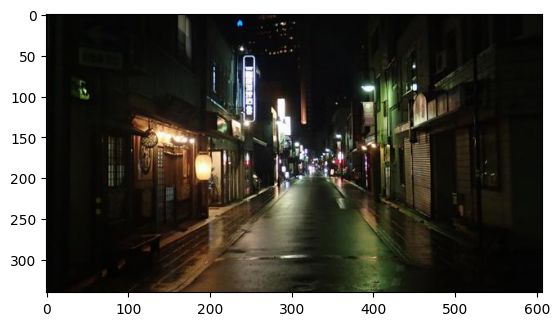

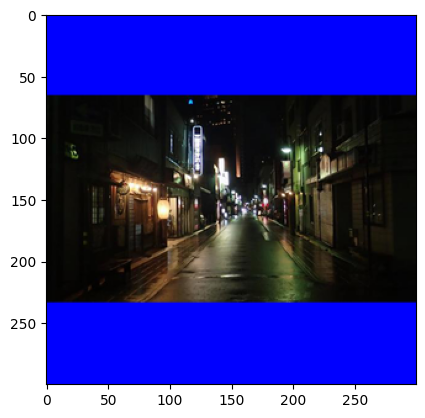

In [33]:
img = Image.open("./image01.jpeg")
img_new = resize_with_padding(img, (300, 300), (0, 0, 255))

plt.imshow(img)
plt.show()

plt.imshow(img_new)
plt.show()

Json 포맷 읽기

In [34]:
import json
import os
import cv2
import matplotlib.pylab as plt

In [35]:
json_path = "./instances_default.json"

with open(json_path, 'r', encoding='utf-8') as j:
    json_data = json.load(j)
    
print(f"json type : {type(json_data)}")
print("json_data : ", json_data)

json type : <class 'dict'>
json_data :  {'licenses': [{'name': '', 'id': 0, 'url': ''}], 'info': {'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}, 'categories': [{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}], 'images': [{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}], 'annotations': [{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]}


In [36]:
print(json_data['categories'])

[{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}]


In [37]:
print(json_data['images'])

[{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]


In [38]:
print(json_data['annotations'])

[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]


In [39]:
json_path = "./instances_default.json"

with open(json_path, 'r', encoding='utf-8') as j:
    json_data = json.load(j)
    
category_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']

label_dict = {1: "cat", 2: "dog"}

{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
./01.jpg
bbox 좌표 >>  468 92 171 248
dog
bbox 좌표 >>  3 183 200 214
cat


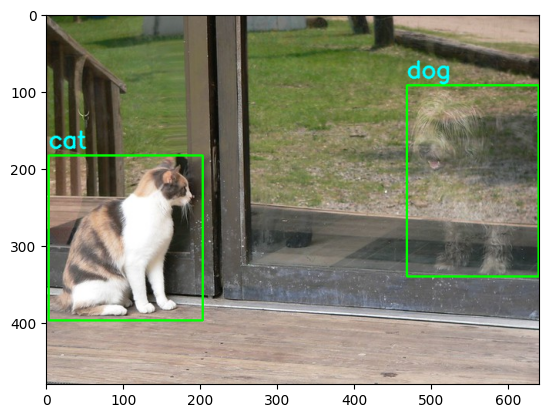

In [40]:
for image_json in images_info:
    print(image_json)
    file_name = image_json['file_name']
    image_path = os.path.join("./", file_name)
    image_id = image_json['id']
    print(image_path)
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    for anno_json in annotations_info:
        if image_id == anno_json['image_id']:
            bbox = anno_json['bbox']
            
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            
            print("bbox 좌표 >> ", x, y, w, h)
            
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
            
            category_id = anno_json['category_id']
            label_name = label_dict[category_id]
            print(label_name)
            image = cv2.putText(image, label_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)
            
    plt.imshow(image)
    plt.show()

XML 포맷 읽기

In [41]:
import os
import cv2
import matplotlib.pylab as plt
from xml.etree.ElementTree import parse

468 92 640 340 dog
3 183 204 397 cat


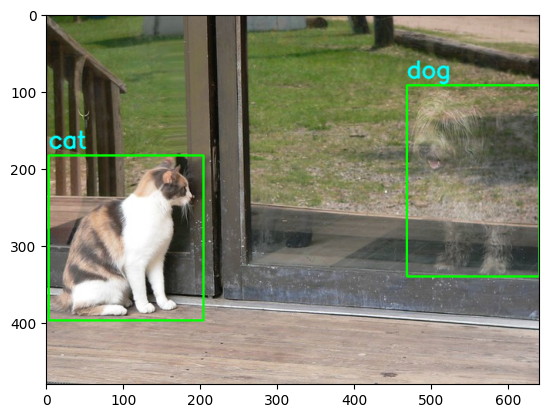

In [42]:
def xml_read(xml_path):
    root = parse(xml_path).getroot()
    image_info = root.findall("image")
    
    for image in image_info:
        bbox = image.findall('box')
        
        image_width = image.attrib['width']
        image_heigth = image.attrib['height']
        
        image_name = image.attrib['name']
        image_name = os.path.join("./", image_name)
        
        image = cv2.imread(image_name)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        for box_info in bbox:
            label = box_info.attrib['label']
            
            xtl = box_info.attrib['xtl']
            ytl = box_info.attrib['ytl']
            xbr = box_info.attrib['xbr']
            ybr = box_info.attrib['ybr']
            
            xtl_f = float(xtl)
            ytl_f = float(ytl)
            xbr_f = float(xbr)
            ybr_f = float(ybr)
            
            xtl_i = int(xtl_f)
            ytl_i = int(ytl_f)
            xbr_i = int(xbr_f)
            ybr_i = int(ybr_f)
            
            print(xtl_i, ytl_i, xbr_i, ybr_i, label)
            
            image = cv2.rectangle(image, (xtl_i, ytl_i), (xbr_i, ybr_i), (0, 255, 0), 2)
            image = cv2.putText(image, label, (xtl_i, ytl_i-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)
            
        plt.imshow(image)
        plt.show()
        
xml_read("./annotations.xml")

Json annotation 값인 yolo 포맷 변경하기

In [43]:
import json
import os
import cv2
import matplotlib.pylab as plt

In [44]:
json_path = "./instances_default.json"

In [45]:
with open(json_path, 'r', encoding='utf-8') as j:
    json_data = json.load(j)
    
    category_info = json_data['categories']
    images_info = json_data['images']
    annotations_info = json_data['annotations']
    
label_dict = {1:0, 2:1}

In [46]:
for image_json in images_info:
    print(image_json)
    file_name = image_json['file_name']
    image_path = os.path.join("./", file_name)
    image_id = image_json['id']
    print(image_path)
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    img_height, img_width, img_channel = image.shape

{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
./01.jpg


In [47]:
for anno_json in annotations_info:
    if image_id == anno_json['image_id']:
        bbox = anno_json['bbox']
        
        x = int(bbox[0])
        y = int(bbox[1])
        w = int(bbox[2])
        h = int(bbox[3])
        
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        category_id = anno_json['category_id']
        label_number = label_dict[category_id]
        
        center_x = ((2*x+w)/(2*img_width))
        center_y = ((2*y+h)/(2*img_height))
        yolo_w = w/img_width
        yolo_h = h/img_height
        
        print("yolo 좌표 변경 값 >> ", label_number, center_x, center_y, yolo_w, yolo_h)
        file_name_temp = file_name.replace(".jpg", "")
        print(file_name_temp)
        
with open(f"{file_name_temp}.txt", "a") as f:
    f.write(f"{label_number} {center_x} {center_y} {yolo_w} {yolo_h} \n")

yolo 좌표 변경 값 >>  1 0.86484375 0.45 0.2671875 0.5166666666666667
01
yolo 좌표 변경 값 >>  0 0.1609375 0.6041666666666666 0.3125 0.44583333333333336
01


XML annotation 값인 yolo 포맷 변경하기

In [48]:
import os
import cv2
import matplotlib.pylab as plt
from xml.etree.ElementTree import parse

In [49]:
label_number_dict = {'cat':0, 'dog':1}

In [50]:
def xml_read(xml_path):
    root = parse(xml_path).getroot()
    image_info = root.findall("image")
    
    for image in image_info:
        bbox = image.findall('box')
        
        image_width = image.attrib['width']
        image_height = image.attrib['height']
        
        image_name = image.attrib['name']
        image_name_temp = image_name
        image_name = os.path.join("./", image_name)
        
        image = cv2.imread(image_name)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        for box_info in bbox:
            label = box_info.attrib['label']
            
            xtl = box_info.attrib['xtl']
            ytl = box_info.attrib['ytl']
            xbr = box_info.attrib['xbr']
            ybr = box_info.attrib['ybr']
            
            xtl_f = float(xtl)
            ytl_f = float(ytl)
            xbr_f = float(xbr)
            ybr_f = float(ybr)
            
            x1_i = int(xtl_f)
            y1_i = int(ytl_f)
            x2_i = int(xbr_f)
            y2_i = int(ybr_f)
            
            img_width_i = int(image_width)
            img_height_i = int(image_height)
            
            center_x = ((x2_i + x1_i)/(2*img_width_i))
            center_y = ((y2_i + y1_i)/(2*img_height_i))
            yolo_w = (x2_i - x1_i)/img_width_i
            yolo_h = (y2_i - y1_i)/img_height_i
            
            image_name_temp = image_name_temp.replace(".jpg", "")
            label_number = label_number_dict[label]
            
            print("Pascal_xyxy to YOLO >> ", label_number, center_x, center_y, yolo_w, yolo_h)
            
            with open(f"{image_name_temp}.txt", "a") as f:
                f.write(f"{label_number} {center_x} {center_y} {yolo_w} {yolo_h} \n")
        
xml_read("./annotations.xml")

Pascal_xyxy to YOLO >>  1 0.865625 0.45 0.26875 0.5166666666666667
Pascal_xyxy to YOLO >>  0 0.16171875 0.6041666666666666 0.3140625 0.44583333333333336


AI-hum 데이터를 활용하여 라벨링 체크: polygon 시각화

In [1]:
import json
import os
import cv2
import glob
import numpy as np

In [2]:
json_dir = './anno'
json_paths = glob.glob(os.path.join(json_dir, "*.json"))
label_dict = {"수각류" : 0}

In [3]:
for json_path in json_paths :
    with open(json_path, 'r', encoding='utf-8') as f:
        json_data = json.load(f)
        
    images_info = json_data['images']
    annotations_info = json_data['annotations']
    
    filename = images_info['filename']
    image_id = images_info['id']
    image_width = images_info['width']
    image_height = images_info['height']
    
    new_width = 1024
    new_height = 768

In [4]:
for ann_info in annotations_info:
    if image_id == ann_info['image_id']:
        image_path = os.path.join("./images/", filename)
        image = cv2.imread(image_path)
        
        scale_x = new_width / image.shape[1]
        scale_y = new_height / image.shape[0]
        
        resized_image = cv2.resize(image, (new_width, new_height))
        
        category_name = ann_info['category_name']
        polygons = ann_info['polygon']
        
        points = []
        for polygon_info in polygons:
            x = polygon_info['x']
            y = polygon_info['y']
            
            resized_x = int(x * scale_x)
            resized_y = int(y * scale_y)
            
            points.append((resized_x, resized_y))
            
        cv2.polylines(resized_image, [np.array(points, np.int32).reshape((-1, 1, 2))], isClosed=True, color=(0, 255, 0), thickness=2)
        
        x_coords = [point[0] for point in points]
        y_coords = [point[1] for point in points]
        x_min = min(x_coords)
        y_min = min(y_coords)
        x_max = max(x_coords)
        y_max = max(y_coords)
        
        cv2.rectangle(resized_image, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
        
        center_x = ((x_max + x_min) / (2 * new_width))
        center_y = ((y_max + y_min) / (2 * new_height))
        yolo_w = (x_max - x_min) / new_width
        yolo_h = (y_max - y_min) / new_height
        
        image_name_temp = filename.replace(".jpg", "")
        
        label_number = label_dict[category_name]
        
    os.makedirs("./yolo_label_data", exist_ok=True)
    with open(f"./yolo_label_data/{image_name_temp}.txt", 'a') as f:  # w는 덮어씌우기, a는 누적저장
        f.write(f"{label_number} {center_x} {center_y} {yolo_w} {yolo_h} \n")
        
    cv2.imshow("Polygon", resized_image)
    
    if cv2.waitKey(0) & 0xFF == ord('q') :
        exit()